Лабораторная 5

Информация о диабете индейцев Пима

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv(".//scv//diabetes.csv")
print(df.columns)
df

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

Очищаем от выбросов

Выбросы в датасете:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80              0        0  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39        0  42.0   
58             0      146             82              0        0  40.5   
100            1      163             72              0        0  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22        0  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             15        0  30.0   
259           11  

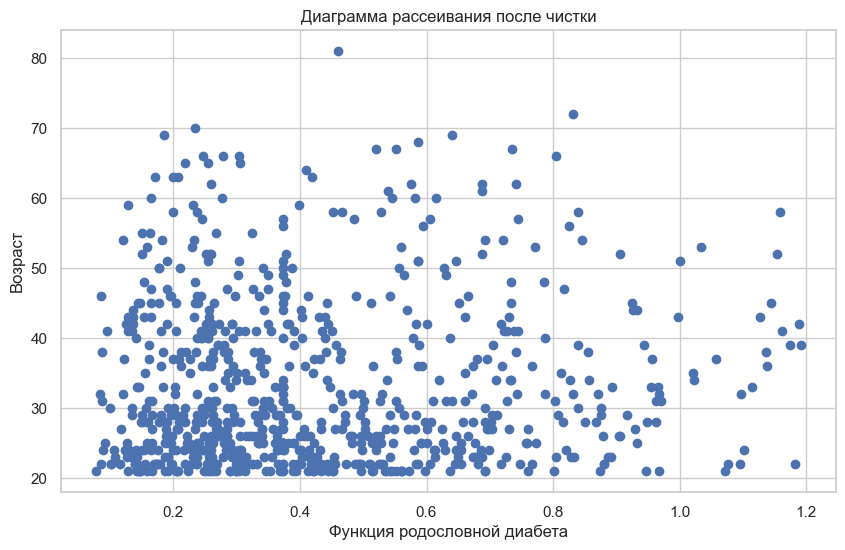

In [77]:
Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df["DiabetesPedigreeFunction"] < lower_bound) | (df["DiabetesPedigreeFunction"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df[outliers])

# Заменяем выбросы на медианные значения
median_score = df["DiabetesPedigreeFunction"].median()
df.loc[outliers, "DiabetesPedigreeFunction"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Визуализация взаимосвязей

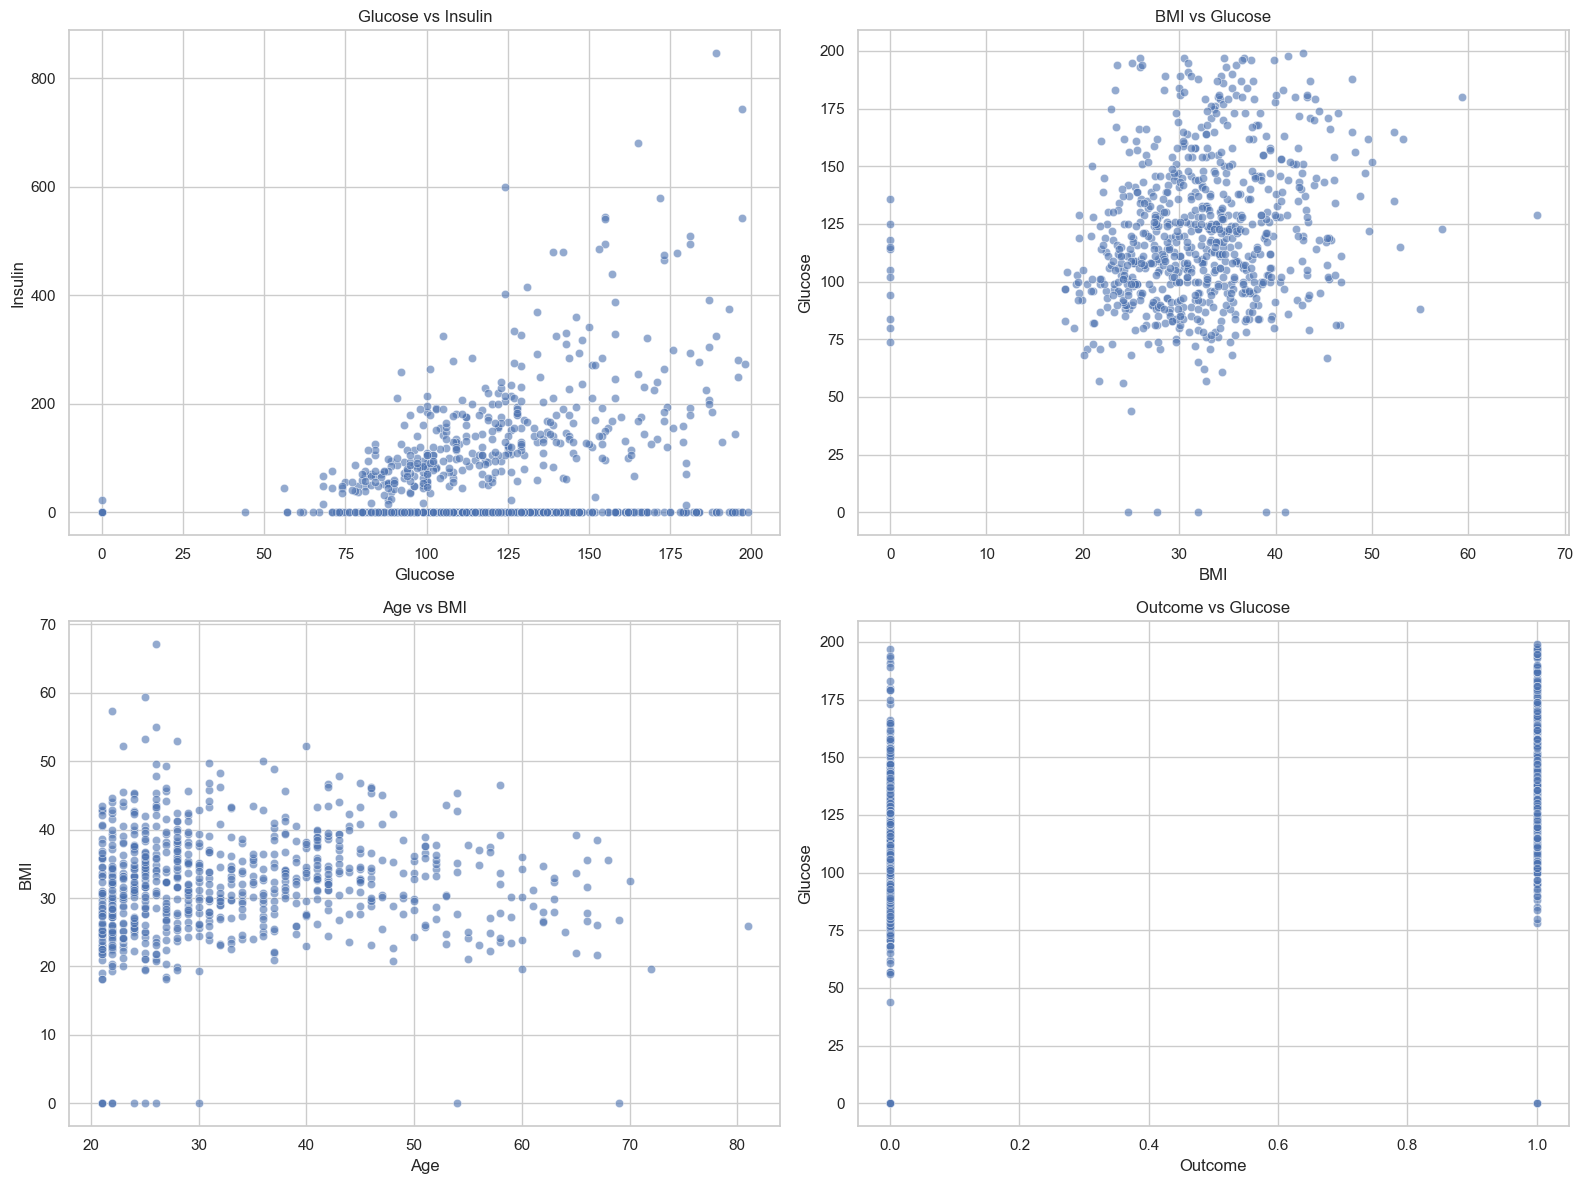

In [78]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Glucose'], y=df['Insulin'], alpha=0.6)
plt.title('Glucose vs Insulin')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['BMI'], y=df['Glucose'], alpha=0.6)
plt.title('BMI vs Glucose')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Age'], y=df['BMI'], alpha=0.6)
plt.title('Age vs BMI')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Outcome'], y=df['Glucose'], alpha=0.6)
plt.title('Outcome vs Glucose')

plt.tight_layout()
plt.show()

Стандартизация данных для кластеризации

In [79]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

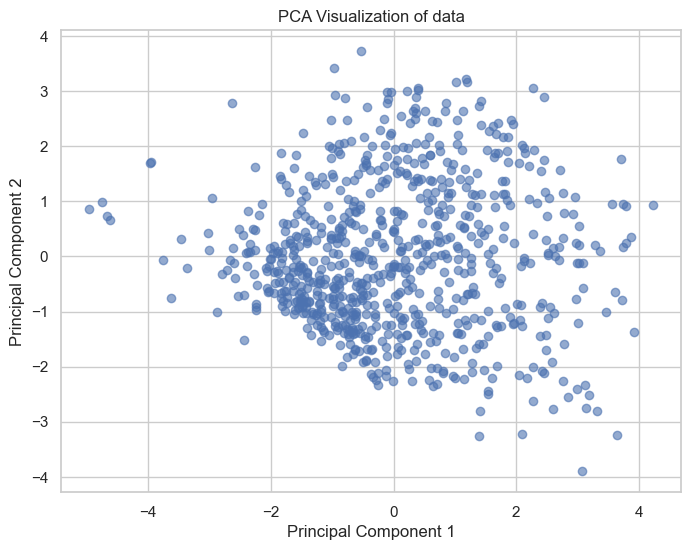

In [80]:
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# Понижение размерности до 2 компонент
pca = PCA(n_components=2)
kc_pca = pca.fit_transform(df_scaled)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(kc_pca[:, 0], kc_pca[:, 1], alpha=0.6)
plt.title("PCA Visualization of data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Иерархическая агломеративная кластеризация


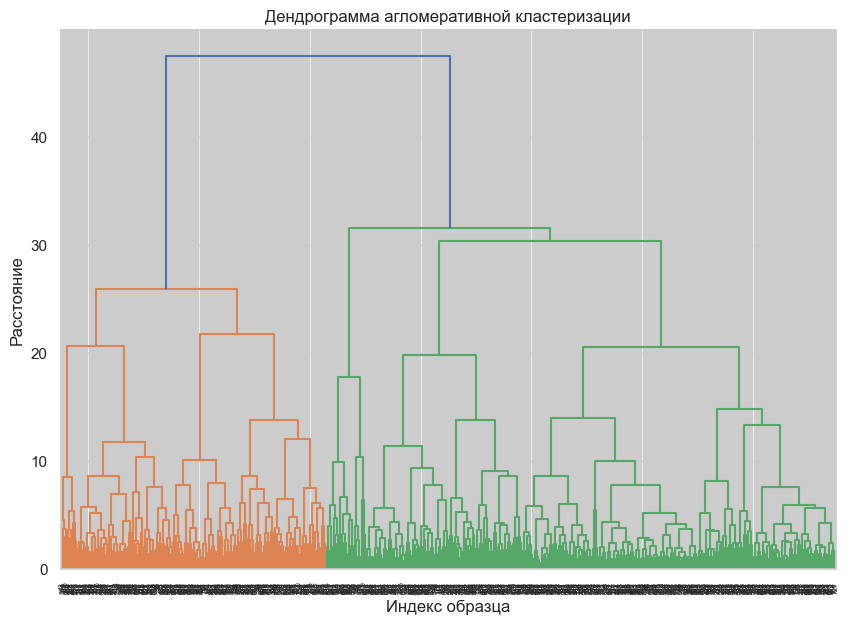

[4 7 4 7 2 6 2 5 1 5 6 3 6 1 4 5 2 3 8 2 8 6 3 4 4 4 3 7 6 6 6 4 7 6 6 7 6
 4 2 2 8 6 6 4 6 2 6 7 4 5 7 7 7 4 4 7 2 8 6 8 5 3 6 7 3 7 2 6 7 8 2 8 4 8
 8 7 6 8 5 7 7 5 6 7 3 7 6 8 4 7 7 7 6 3 7 8 7 7 7 2 3 6 6 7 6 7 6 8 8 2 2
 1 8 6 2 3 3 6 7 7 2 8 8 6 3 2 8 8 2 3 2 4 2 6 7 8 7 7 7 8 6 8 7 3 8 5 6 8
 6 7 8 7 4 1 3 4 7 7 7 4 6 6 8 7 4 2 8 7 6 7 3 2 5 8 7 4 6 2 6 4 6 7 7 6 6
 4 1 2 2 2 6 6 3 5 6 2 6 3 2 2 7 6 7 7 6 7 4 3 8 4 7 8 6 2 4 4 2 8 2 3 1 3
 5 4 7 8 6 2 1 8 3 2 7 6 7 3 4 2 4 7 7 7 3 2 8 3 6 1 8 7 6 6 7 8 4 2 7 7 8
 4 8 5 7 6 3 6 5 8 6 5 4 7 6 8 6 8 2 7 6 7 3 6 8 3 3 6 1 2 7 8 8 2 2 2 6 8
 2 7 4 6 5 2 8 3 6 8 4 8 2 2 6 8 2 7 4 8 7 3 8 3 7 2 2 4 8 8 2 6 2 8 6 7 5
 6 7 8 5 3 4 3 7 7 7 6 6 6 7 5 7 7 6 6 8 7 6 3 2 5 6 4 4 6 6 3 8 7 3 7 7 2
 1 5 7 8 8 4 7 8 3 8 7 7 7 7 8 7 4 4 4 7 8 3 8 7 4 8 7 2 7 2 3 6 2 6 3 8 3
 7 4 1 6 7 8 8 2 1 7 4 7 2 8 7 8 7 2 2 5 2 8 2 5 7 7 6 7 5 6 6 7 6 2 7 8 4
 3 2 7 8 2 7 7 3 8 5 8 4 6 7 4 6 6 7 6 7 6 7 7 8 5 8 8 8 8 6 6 6 2 7 8 6 2
 8 7 8 5 2 1 4 7 6 7 8 8 

In [81]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

result = fcluster(linkage_matrix, t=20, criterion='distance')
print(result) 

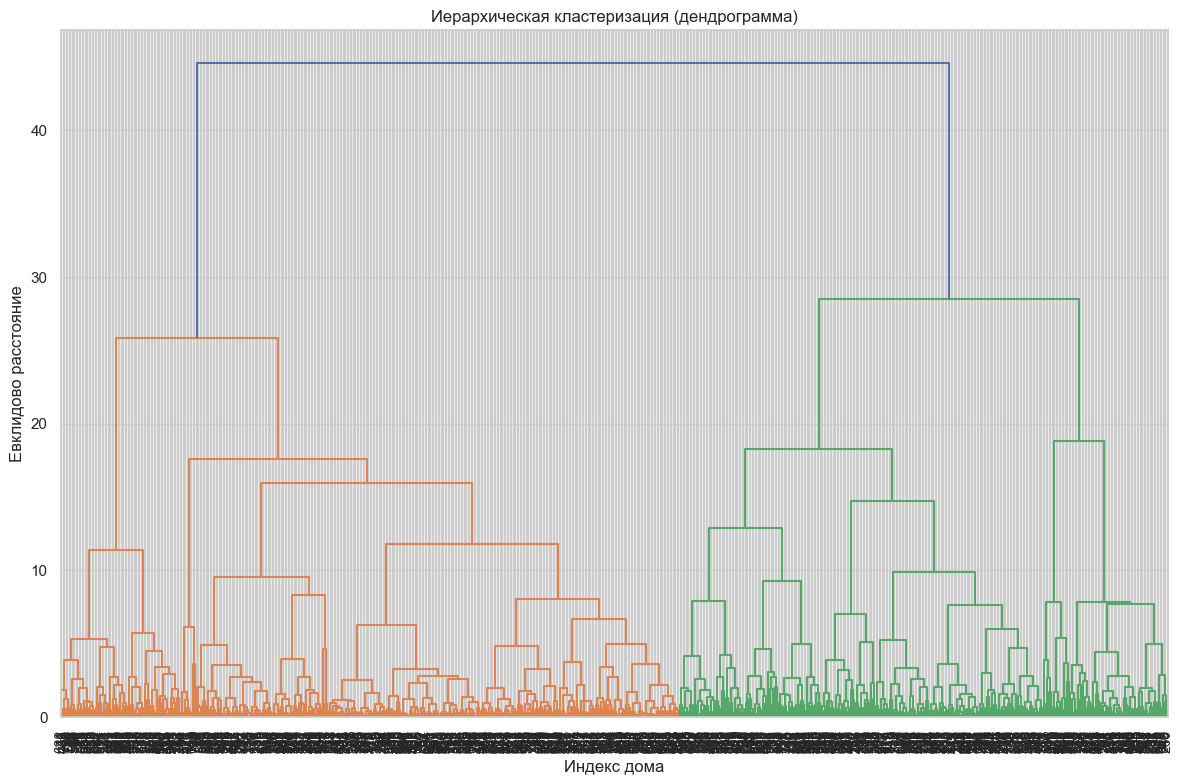

In [82]:
# Выбираем подмножество данных для кластеризации
features = df[['BMI', 'Glucose', 'Age', 'Outcome', 'Insulin']]

scaled_features = scaler.fit_transform(features)

# Построение дендрограммы
linkage_matrix = linkage(scaled_features, method='ward')  # Метод "Ward"

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Иерархическая кластеризация (дендрограмма)')
plt.xlabel('Индекс дома')
plt.ylabel('Евклидово расстояние')
plt.tight_layout()
plt.show()

Визуализация кластеров

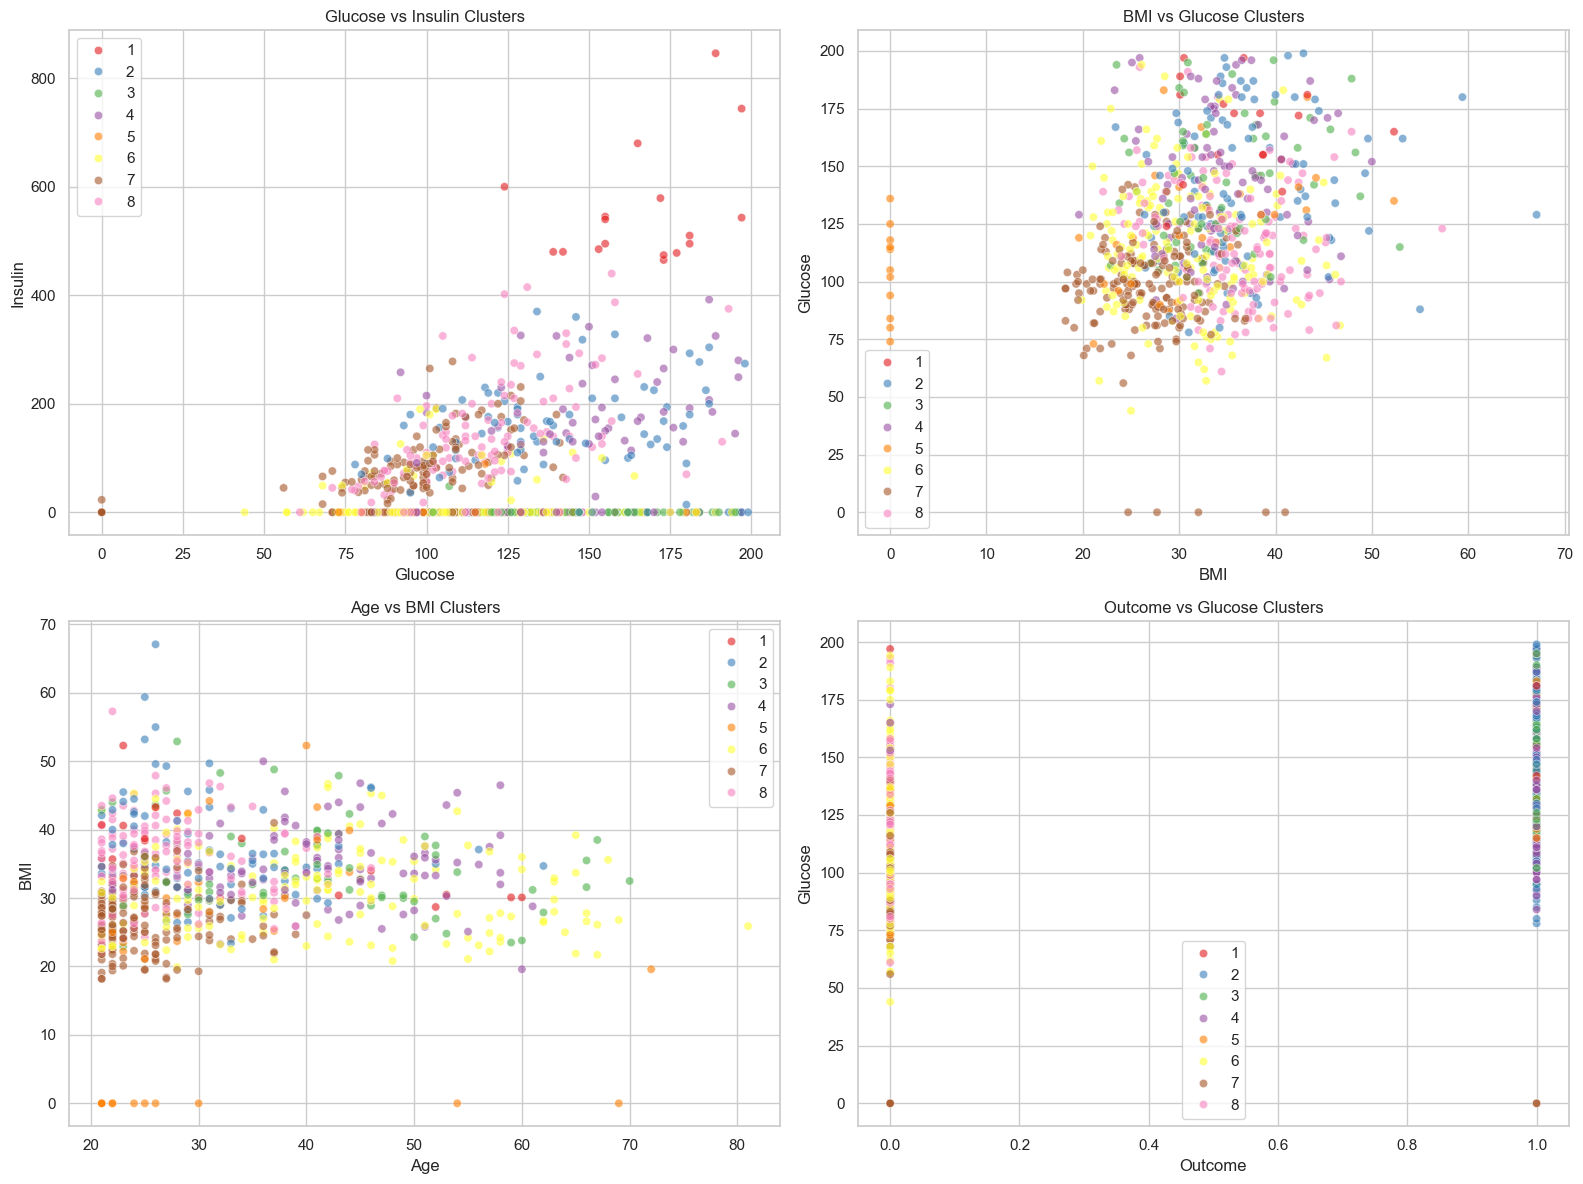

In [89]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)

sns.scatterplot(x=df['Glucose'], y=df['Insulin'], hue=result, palette='Set1', alpha=0.6)
plt.title('Glucose vs Insulin Clusters')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['BMI'], y=df['Glucose'], hue=result, palette='Set1', alpha=0.6)
plt.title('BMI vs Glucose Clusters')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Age'], y=df['BMI'], hue=result, palette='Set1', alpha=0.6)
plt.title('Age vs BMI Clusters')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Outcome'], y=df['Glucose'], hue=result, palette='Set1', alpha=0.6)
plt.title('Outcome vs Glucose Clusters')

plt.tight_layout()
plt.show()

KMeans (неиерархическая кластеризация) для сравнения

Центры кластеров:
 [[ 3.39431138e+01  1.05173653e+02  4.19700599e+01  1.27970060e+02
  -1.11022302e-16]
 [ 3.53015209e+01  1.01726236e+02  3.71749049e+01  1.42802281e+02
   1.00000000e+00]
 [ 2.84541420e+01  5.02011834e+01  2.58668639e+01  1.00352071e+02
   1.47928994e-02]]


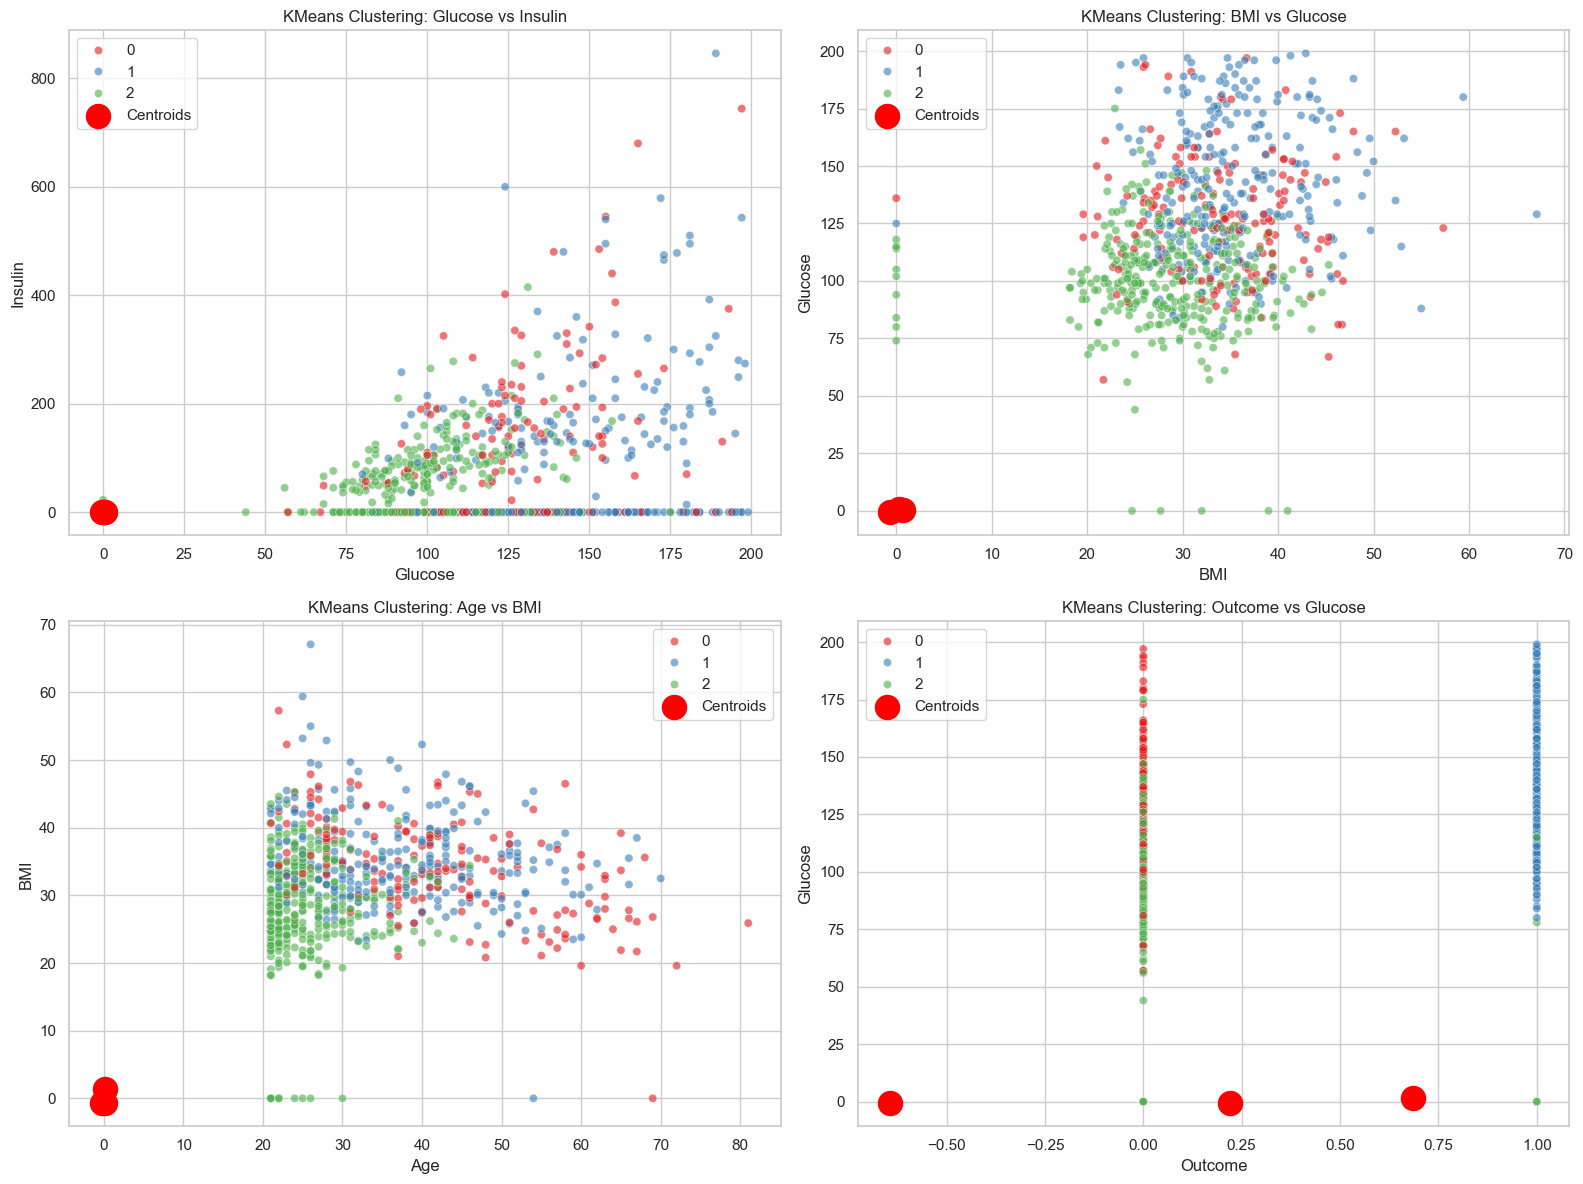

In [84]:
features_used = ['BMI', 'Insulin', 'Age', 'Glucose', 'Outcome']
data_to_scale = df[features_used]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers_original = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers_original)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df['Glucose'], y=df['Insulin'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Glucose vs Insulin')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df['BMI'], y=df['Glucose'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: BMI vs Glucose')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df['Age'], y=df['BMI'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Age vs BMI')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df['Outcome'], y=df['Glucose'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Outcome vs Glucose')
plt.legend()

plt.tight_layout()
plt.show()

PCA для визуализации сокращенной размерности

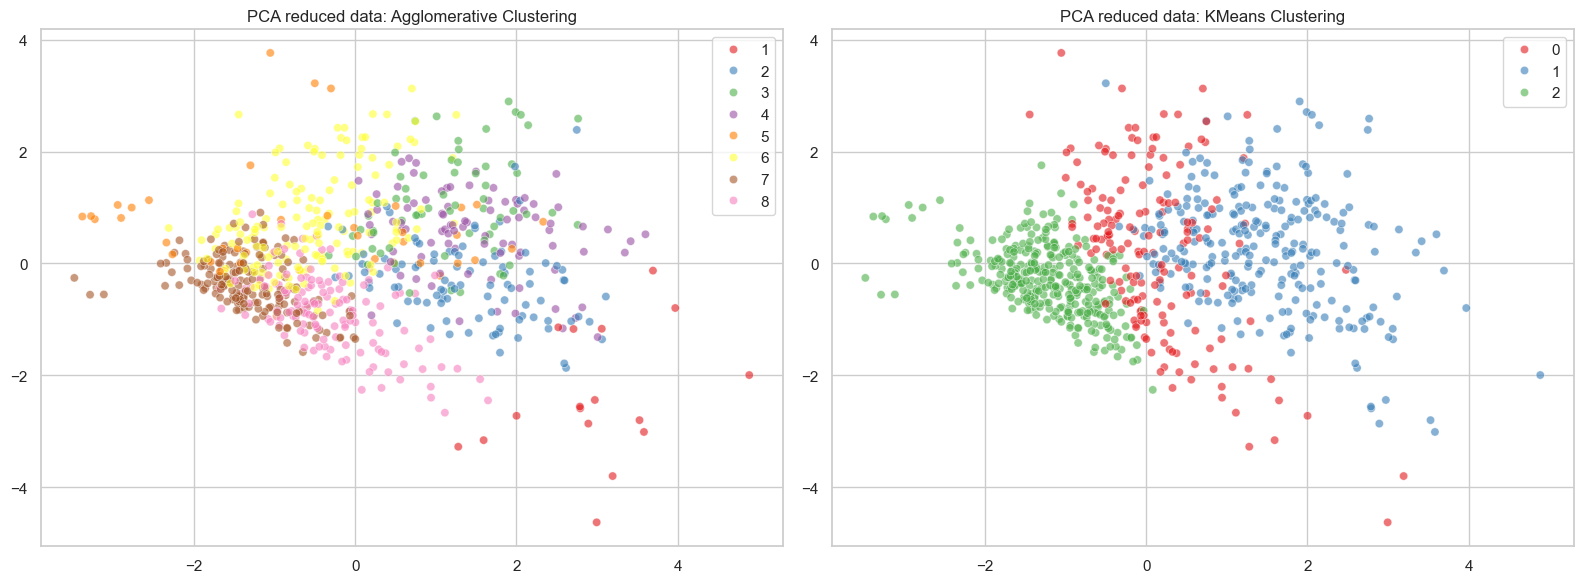

In [85]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()

Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)

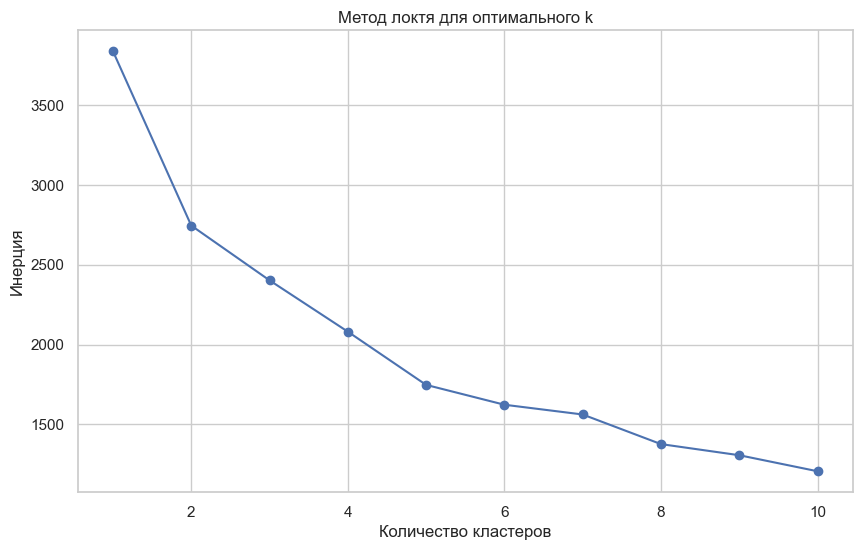

In [86]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()

Оптимальное количество кластеров согласно методу локтя 2

Расчет коэффициентов силуэта

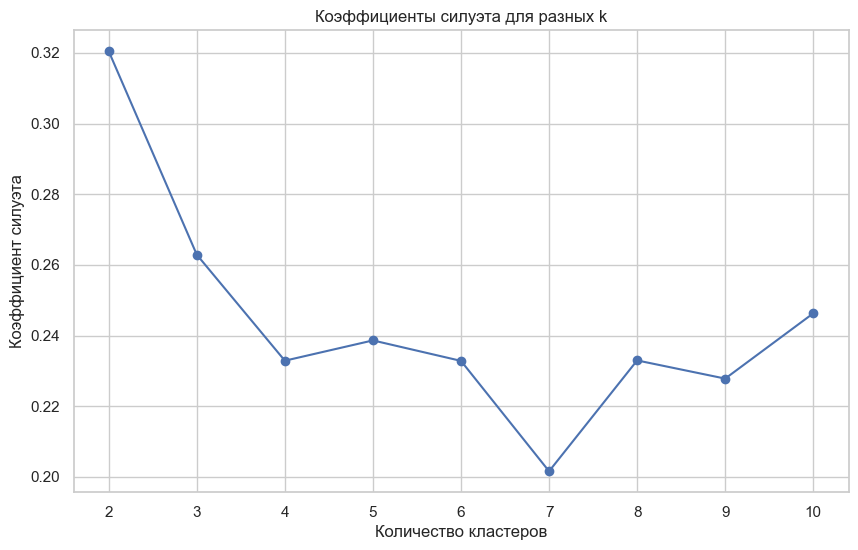

In [87]:
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.191


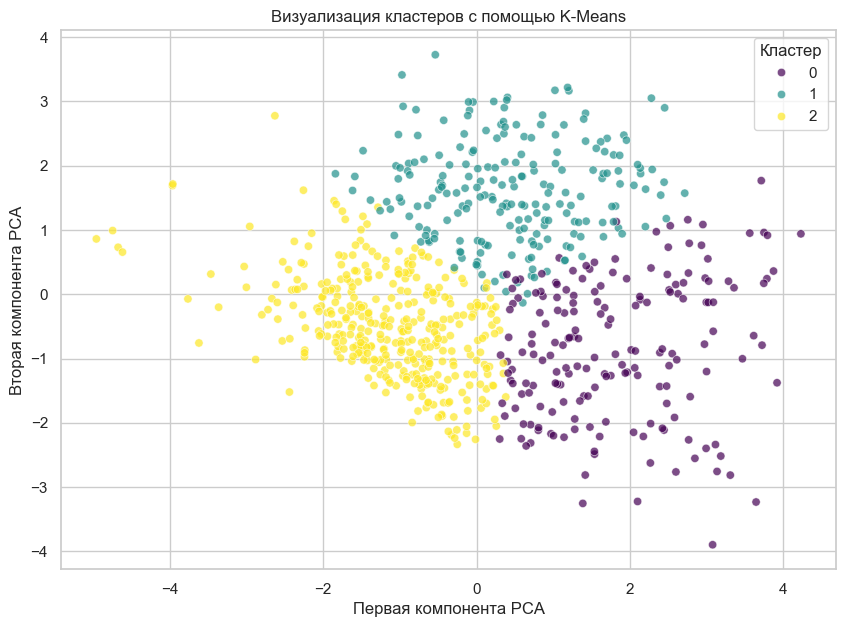

In [88]:
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg = silhouette_score(df_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# ========================
# Визуализация кластеров
# ========================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()

Cредний коэффициент силуэта, равный 0.191, указывает на умеренно хорошую кластеризацию.